# Ethics attitudes
This notebook is for comparing out results to UofT

In [1]:
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import starbars 

import os
import sys
import yaml
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals

# ignore plotting warnings to save space
import warnings
warnings.filterwarnings('ignore')

In [2]:
# vars
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]
attitudes = ["Interest", "Value", "Self-efficacy", "Responsibility"]

# current semester (for script purposes)
semester = "F2025"

In [3]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"
questions_file = f"{semester}_survey.yaml"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [4]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)

# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

cg_data_full = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
# add the students who did not attend EE
cg_data = pd.concat([cg_data_full, ee_data_full[ee_data_full["EE course"]["None"] == 1]], axis=0)

data_all = [ee_data, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

# get survey questions
with open(os.path.join(data_dir, questions_file), 'r') as yaml_file:
    questions = yaml.safe_load(yaml_file)

## Comparision with [2022 paper](https://doi.org/10.1145/3478431.3499407). 

In [ ]:
mcgill_ee_data_2022 = pd.concat([ee_data["Interest"][["Q1", "Q5"]], ee_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]], axis=1)
mcgill_cg_data_2022 = pd.concat([cg_data["Interest"][["Q1", "Q5"]], cg_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]], axis=1)

mcgill_ee_avg_2022 = mcgill_ee_data_2022.sum(axis=1).mean()
mcgill_cg_avg_2022 = mcgill_cg_data_2022.sum(axis=1).mean()

mcgill_ee_std_2022 = mcgill_ee_data_2022.sum(axis=1).std()
mcgill_cg_std_2022 = mcgill_cg_data_2022.sum(axis=1).std()

# post data for UofT
uoft_ee_avg_2022 = 32.39
uoft_cg_avg_2022 = 28.21

uoft_ee_std_2022 = 5.87
uoft_cg_std_2022 = 7.15

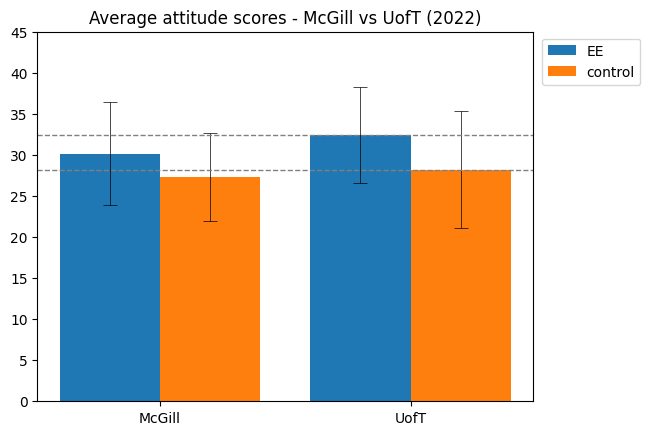

In [ ]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_avg_2022, uoft_ee_avg_2022], width=bar_width, label="EE", yerr=[mcgill_ee_std_2022, uoft_ee_std_2022], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_avg_2022, uoft_cg_avg_2022], width=bar_width, label="control",yerr=[mcgill_cg_std_2022, uoft_cg_std_2022], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_avg_2022, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_avg_2022, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 46, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average attitude scores - McGill vs UofT (2022)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Does McGill have a statistically significant difference between EE and CG group?

In [ ]:
pg_stats = pg.ttest(mcgill_ee_data_2022.sum(axis=1), mcgill_cg_data_2022.sum(axis=1))
print(f"T-test for EASE")
display(pg_stats)

T-test for EASE


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.510508,92.133975,two-sided,0.013799,"[0.6, 5.1]",0.491406,3.268,0.719813


Comparison with 2023 paper.

In [ ]:
mcgill_ee_attitude_data_2023 = pd.concat([ee_data["Interest"][["Q1", "Q5"]], ee_data["Value"][["Q1", "Q2"]], ee_data["Responsibility"][["Q1"]]], axis=1)
mcgill_cg_attitude_data_2023 = pd.concat([cg_data["Interest"][["Q1", "Q5"]], cg_data["Value"][["Q1", "Q2"]], cg_data["Responsibility"][["Q1"]]], axis=1)
mcgill_ee_se_data_2023 = ee_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]
mcgill_cg_se_data_2023 = cg_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]

mcgill_ee_attitude_avg_2023 = mcgill_ee_attitude_data_2023.sum(axis=1).mean()
mcgill_cg_attitude_avg_2023 = mcgill_cg_attitude_data_2023.sum(axis=1).mean()
mcgill_ee_se_avg_2023 = mcgill_ee_se_data_2023.sum(axis=1).mean()
mcgill_cg_se_avg_2023 = mcgill_cg_se_data_2023.sum(axis=1).mean()

mcgill_ee_attitude_std_2023 = mcgill_ee_attitude_data_2023.sum(axis=1).std()
mcgill_cg_attitude_std_2023 = mcgill_cg_attitude_data_2023.sum(axis=1).std()
mcgill_ee_se_std_2023 = mcgill_ee_se_data_2023.sum(axis=1).std()
mcgill_cg_se_std_2023 = mcgill_cg_se_data_2023.sum(axis=1).std()

# post data for UofT
uoft_ee_attitude_avg_2023 = 28.22
uoft_cg_attitude_avg_2023 = 27.02
uoft_ee_se_avg_2023 = 19.52
uoft_cg_se_avg_2023 = 17.87

uoft_ee_attitude_std_2023 = 5.28
uoft_cg_attitude_std_2023 = 5.65
uoft_ee_se_std_2023 = 4.71
uoft_cg_se_std_2023 = 4.96

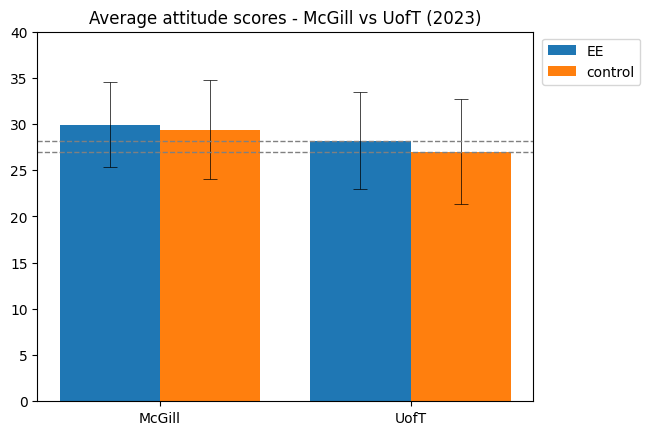

In [ ]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_attitude_avg_2023, uoft_ee_attitude_avg_2023], width=bar_width, label="EE", yerr=[mcgill_ee_attitude_std_2023, uoft_ee_attitude_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_attitude_avg_2023, uoft_cg_attitude_avg_2023], width=bar_width, label="control",yerr=[mcgill_cg_attitude_std_2023, uoft_cg_attitude_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_attitude_avg_2023, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_attitude_avg_2023, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 41, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average attitude scores - McGill vs UofT (2023)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Significant difference for attitudes at McGill

In [ ]:
pg_stats = pg.ttest(mcgill_ee_attitude_data_2023.sum(axis=1), mcgill_cg_attitude_data_2023.sum(axis=1))
print(f"T-test for Attitude")
display(pg_stats)

T-test for Attitude


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.549162,107.456175,two-sided,0.584033,"[-1.36, 2.4]",0.103032,0.232,0.083136


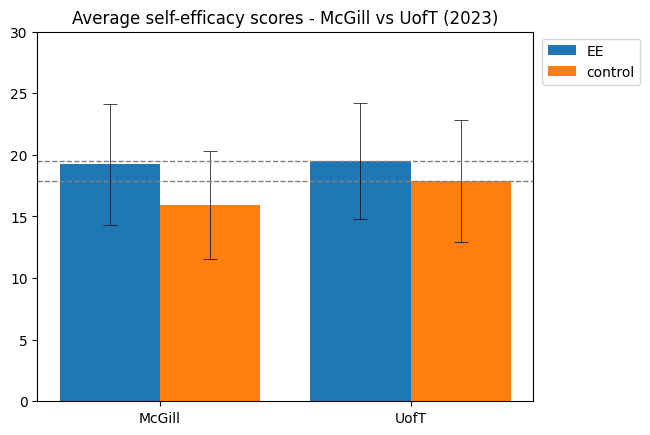

In [ ]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_se_avg_2023, uoft_ee_se_avg_2023], width=bar_width, label="EE", yerr=[mcgill_ee_se_std_2023, uoft_ee_se_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_se_avg_2023, uoft_cg_se_avg_2023], width=bar_width, label="control",yerr=[mcgill_cg_se_std_2023, uoft_cg_se_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_se_avg_2023, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_se_avg_2023, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 31, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average self-efficacy scores - McGill vs UofT (2023)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Significant difference for attitudes at McGill


In [ ]:
pg_stats = pg.ttest(mcgill_ee_se_data_2023.sum(axis=1), mcgill_cg_se_data_2023.sum(axis=1))
print(f"T-test for Self-Efficacy")
display(pg_stats)

T-test for Self-Efficacy


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.676429,95.25067,two-sided,0.000391,"[1.52, 5.1]",0.714721,69.355,0.958847
